In [1]:
# export full genome
from pybedtools import genome_registry, chromsizes_to_file, chromsizes
chromsizes_to_file(chromsizes('hg19'), '../download/genome/hg19.genome')

'../download/genome/hg19.genome'

In [2]:
assembly_path = "../download/genome/hg19_reduced.genome"

In [3]:
import pandas as pd
import numpy as np
from pybedtools import BedTool

In [4]:
store = pd.HDFStore("../storage/fantom_staging.hdf")
store_repeat = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [5]:
store.keys()

['/permissive', '/permissive_bed']

In [6]:
store_repeat.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [7]:
store.close()
store_repeat.close()

In [8]:
fantom_bed = BedTool().from_dataframe(pd.read_hdf("../storage/fantom_staging.hdf", "permissive_bed"))

In [9]:
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "Retroposon_SVA_bed")
repeat_bed = BedTool().from_dataframe(repeat_bed_df)

In [10]:
fantom_bed.head()

chr1	858256	858648	FANTOM.5.PERMISSIVE.0	5	.
 chr1	918449	918555	FANTOM.5.PERMISSIVE.1	18	.
 chr1	941791	942135	FANTOM.5.PERMISSIVE.2	2	.
 chr1	945769	946034	FANTOM.5.PERMISSIVE.3	17	.
 chr1	956563	956812	FANTOM.5.PERMISSIVE.4	143	.
 chr1	1005293	1005547	FANTOM.5.PERMISSIVE.5	66	.
 chr1	1014834	1015095	FANTOM.5.PERMISSIVE.6	17	.
 chr1	1060905	1061095	FANTOM.5.PERMISSIVE.7	7	.
 chr1	1063914	1064111	FANTOM.5.PERMISSIVE.8	50	.
 chr1	1093610	1093958	FANTOM.5.PERMISSIVE.9	7	.
 

In [11]:
fantom_bed.count()

43011

In [12]:
repeat_bed.count()

5420

In [13]:
repeat_bed.to_dataframe()['chrom'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
       'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
       'chr22', 'chr21'], dtype=object)

In [14]:
fantom_bed_df = fantom_bed.to_dataframe()

In [15]:
# removing chroms
chroms = fantom_bed_df['chrom'].unique()
repeat_bed = BedTool().from_dataframe(repeat_bed_df.query('chrom in @chroms'))

In [16]:
repeat_bed.count()

5420

### Alu size distribution

In [17]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

In [18]:
# Alu size
repeat_bed_df = repeat_bed.to_dataframe()
repeat_bed_df['size'] = repeat_bed_df.apply(lambda row: compute_size(row), axis=1)

In [19]:
repeat_sizes_df = repeat_bed_df[['size']]

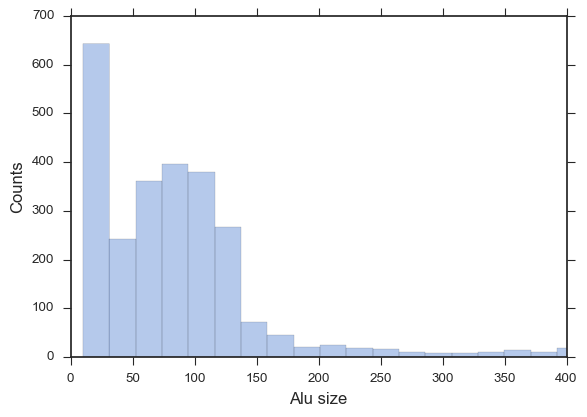

In [20]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2})
ax = sns.distplot(repeat_sizes_df, kde=False, bins=200)
ax.set_xlim(0,400)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('Alu size', size=12)

In [21]:
repeat_bed_df.head()

,chrom,start,end,name,score,strand,size
0,chr1,333504,333563,RepeatMasker.0.SVA_E.361,468,.,59
1,chr1,772479,772560,RepeatMasker.1.SVA_D.967,270,.,81
2,chr1,6364454,6366296,RepeatMasker.2.SVA_D.7916,9901,.,1842
3,chr1,6774568,6776390,RepeatMasker.3.SVA_D.8689,6435,.,1822
4,chr1,7660546,7662062,RepeatMasker.4.SVA_D.10031,11216,.,1516


In [22]:
def compare_null_model(counts, real_count, plot=True):
    import scipy.stats as st
    print("mean:", np.mean(counts), "std:", np.std(counts))
    if plot:
        import seaborn as sns
        %matplotlib inline

        sns.distplot(counts, kde=False, fit=st.norm, bins=20)
    z_score =(real_count - np.mean(counts))/np.std(counts)
    p_values = st.norm.sf(abs(z_score))
    print("z-score:", z_score, "p-value:",p_values)

In [23]:
def build_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(bed_overlap_with, F=1)
    return core_null_model_intersection.count()

In [24]:
def build_shuffled_full_overlap_with(bed, bed_overlap_with, assembly_path):
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [25]:
def build_shuffled_on_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

## Full Alu in enhancer

In [30]:
real_count = fantom_bed.intersect(repeat_bed, f=0.1).count()
real_count

7

In [31]:
repeat_bed.intersect(fantom_bed, f=1).count()

2

In [32]:
fantom_bed.sort().fisher(repeat_bed.sort(), F=1, g=assembly_path)

<FisherOutput at 4765203648>
# Number of query intervals: 43011
# Number of db intervals: 5420
# Number of overlaps: 2
# Number of possible intervals (estimated): 2912456
# phyper(2 - 1, 43011, 2912456 - 43011, 5420, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 2            | 43009        |
# not in -a | 5418         | 2864027      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
2.9973e-32	1	6.011e-32	0.025

In [33]:
fantom_bed.sort().jaccard(repeat_bed.sort(), F=1, g=assembly_path)

{'intersection': 104,
 'jaccard': 6.27928e-06,
 'n_intersections': 2,
 'union-intersection': 16562405}

### Null Model 1: shuffled enhancers

In [34]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap)
                                             (fantom_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 7.62 std: 3.25508832445
z-score: -0.190471022043 p-value: 0.424470024281


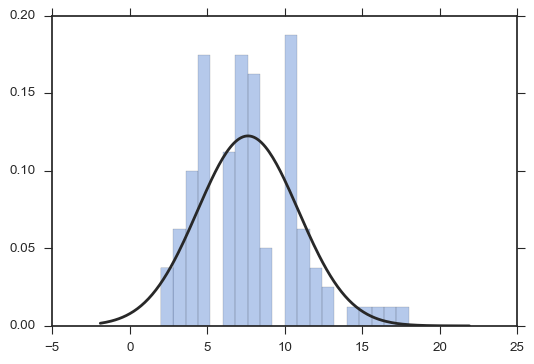

In [35]:
compare_null_model(counts, real_count)

### Null Model 2: shuffled repeats

In [ ]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap_with)
                                             (fantom_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

In [ ]:
compare_null_model(counts, real_count)

### Null Model 3: shuffled on shuffled

In [52]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_on_shuffled_full_overlap)
                                             (fantom_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 1349.41 std: 36.0186326781
z-score: -19.9455100481 p-value: 8.19846606607e-89


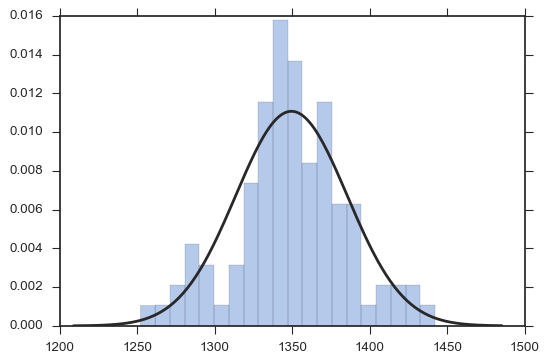

In [53]:
compare_null_model(counts, real_count)

## Counting occurences per enhancer

In [54]:
fantom_bed = BedTool().from_dataframe(
    fantom_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [55]:
overlap_occurences_df = fantom_bed.intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_df = fantom_bed.shuffle(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_2_df = fantom_bed.intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_null_3_df = fantom_bed.shuffle(g=assembly_path).intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_complement_df = fantom_bed.sort().complement(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()

In [56]:
occ_cols = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'occurences']
overlap_occurences_df.columns = occ_cols
overlap_occurences_null_df.columns = occ_cols
overlap_occurences_null_2_df.columns = occ_cols
overlap_occurences_null_3_df.columns = occ_cols
overlap_occurences_complement_df.columns = ['chrom', 'start', 'end', 'occurences']

In [57]:
occurences = overlap_occurences_df.query("occurences > 0")['occurences'].tolist()
occurences_null = overlap_occurences_null_df.query("occurences > 0")['occurences'].tolist()
occurences_null_2 = overlap_occurences_null_2_df.query("occurences > 0")['occurences'].tolist()
occurences_null_3 = overlap_occurences_null_3_df.query("occurences > 0")['occurences'].tolist()
occurences_complement = overlap_occurences_complement_df.query("occurences > 0")['occurences'].tolist()

In [58]:
occ_freq, occ_base = np.histogram(occurences, bins=range(1,26))
occ_freq_null, _ = np.histogram(occurences_null, bins=range(1,26))
occ_freq_null_2, _ = np.histogram(occurences_null_2, bins=range(1,26))
occ_freq_null_3, _ = np.histogram(occurences_null_3, bins=range(1,26))
occ_freq_complement, _ = np.histogram(occurences_complement, bins=range(1,26))

occ_ratio = occ_freq / sum(occ_freq)
occ_ratio_null = occ_freq_null / sum(occ_freq_null)
occ_ratio_null_2 = occ_freq_null_2 / sum(occ_freq_null_2)
occ_ratio_null_3 = occ_freq_null_3 / sum(occ_freq_null_3)
occ_ratio_complement = occ_freq_complement / sum(occ_freq_complement)

[None]

/Users/manuel/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


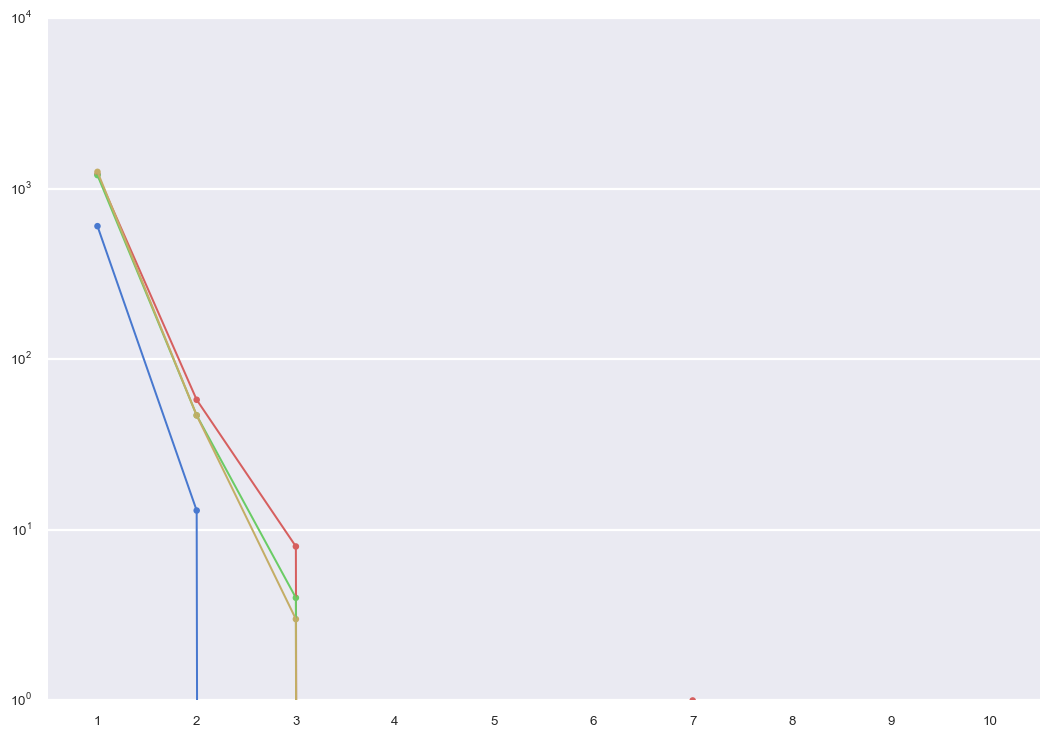

In [59]:
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
sns.set_style("darkgrid")
g1 = sns.pointplot(x=occ_base[:10], y=occ_freq[:10], color='b')
g2 = sns.pointplot(x=occ_base[:10], y=occ_freq_null[:10], color='r')
g3 = sns.pointplot(x=occ_base[:10], y=occ_freq_null_2[:10], color='g')
g4 = sns.pointplot(x=occ_base[:10], y=occ_freq_null_3[:10], color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
g1.set(yscale='log')

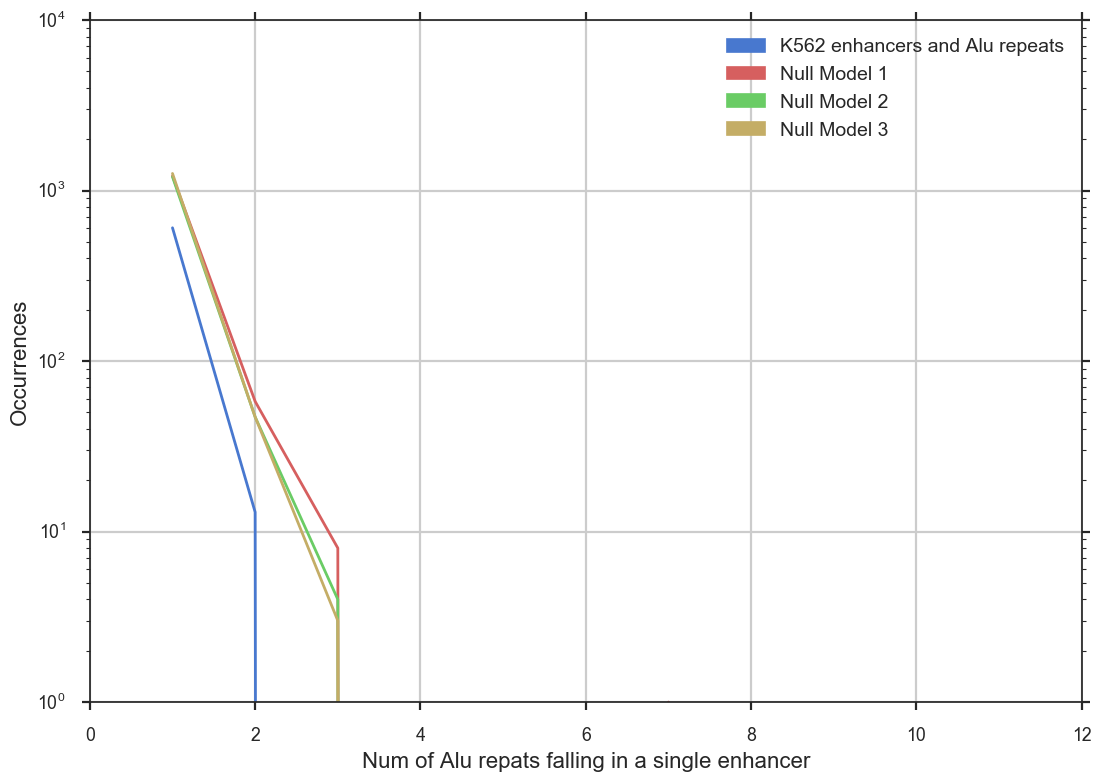

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.patches as mpatches
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)

g1 = plt.plot(occ_base[:12], occ_freq[:12], color='b')
g2 = plt.plot(occ_base[:12], occ_freq_null[:12], color='r')
g3 = plt.plot(occ_base[:12], occ_freq_null_2[:12], color='g')
g4 = plt.plot(occ_base[:12], occ_freq_null_3[:12], color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
ax.axes.set_yscale('log')

ax.grid()

#sns.despine(offset=10, trim=True)

ax.set_ylabel('Occurrences', size=16)
ax.set_xlabel('Num of Alu repats falling in a single enhancer', size=16)

blue_patch = mpatches.Patch(color='b', label='K562 enhancers and Alu repeats')
red_patch = mpatches.Patch(color='r', label='Null Model 1')
green_patch = mpatches.Patch(color='g', label='Null Model 2')
yellow_patch = mpatches.Patch(color='y', label='Null Model 3')

plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], fontsize=14, loc=1)

In [46]:
import scipy.stats as st
print(st.expon.fit(occ_freq[:10]))
print(st.expon.fit(occ_freq_null[:10]))
print(st.expon.fit(occ_freq_null_2[:10]))
print(st.expon.fit(occ_freq_null_3[:10]))

(5.9999999999810854, 619.30000415560414)
(13.999999999977749, 786.80005911623766)
(1.999999999990602, 943.00007570431035)
(0.99999999998651301, 956.40000544818349)


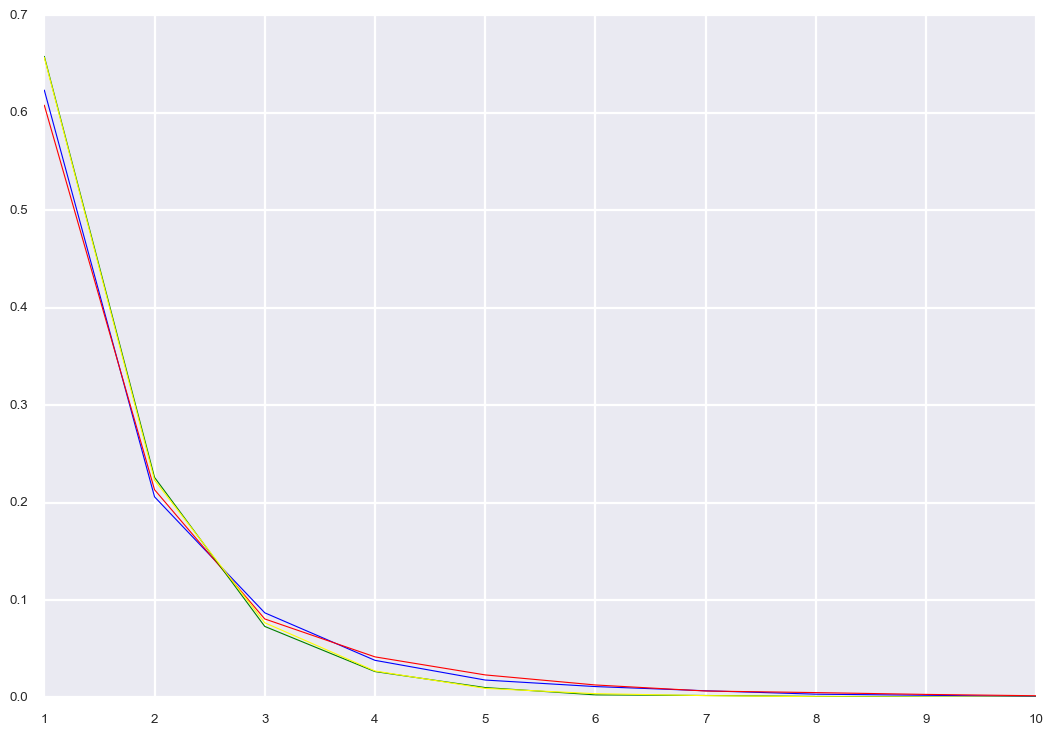

In [47]:
# ratios normalized
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10], c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10], c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10], c='green')
ax = plt.plot(occ_base[:10], occ_ratio_null_3[:10], c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()


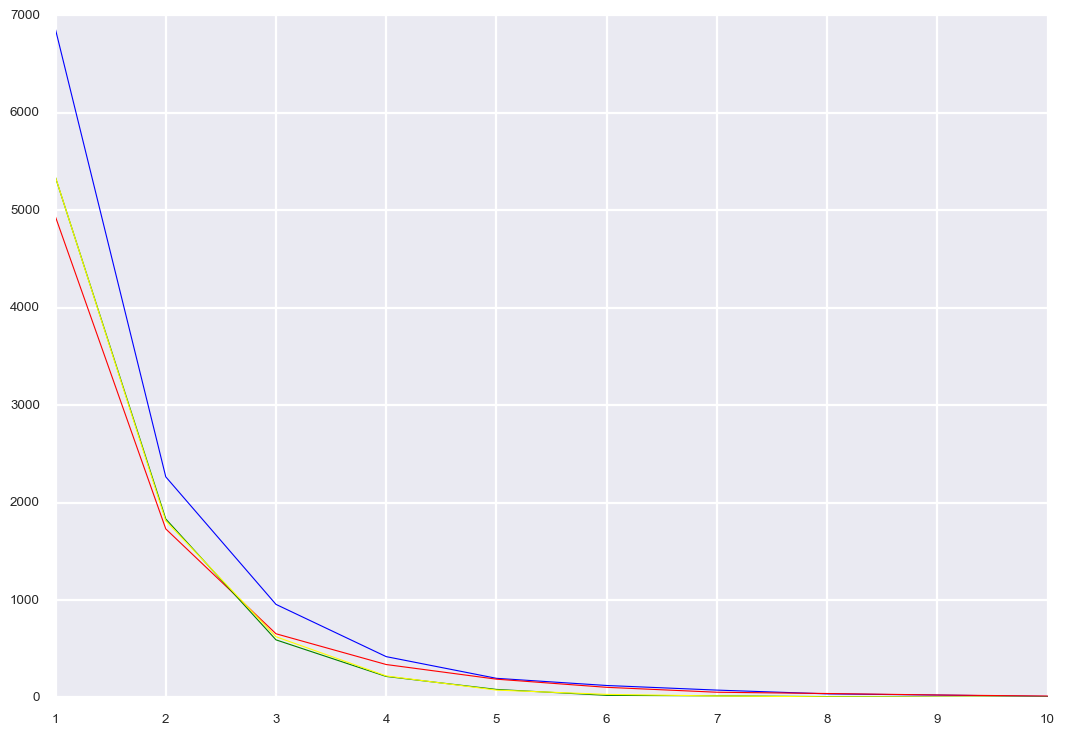

In [48]:
# ratios normalized adjusted (with overlap count)
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10]*real_count, c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10]*8112, c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10]*8108, c='green')
plt.plot(occ_base[:10], occ_ratio_null_3[:10]*8125, c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()
